# Airfoil experiments
All data is available in the repository

In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


# Setup

(5120, 6)
(5120, 3)


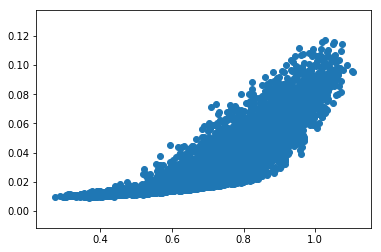

In [8]:
mc_points_preprocessed = np.loadtxt('../mc6.txt')
forces = np.loadtxt('../force_6_params_mc.dat')
mc_points = []
for f in forces[:,0]:
    for n in range(mc_points_preprocessed.shape[0]):
        if mc_points_preprocessed[n,0] == f:
            mc_points.append(mc_points_preprocessed[n,1:])
mc_points = np.array(mc_points)




input_size=6
train_size=128
validation_size=128

epochs = 500000

airfoils_network = [12, 12, 10, 12, 10, 12, 10, 10, 12,1]

print(mc_points.shape)
print(forces.shape)
plt.scatter(forces[:,1], forces[:,2])

# One network per variable


Training took 5761.128856897354 seconds


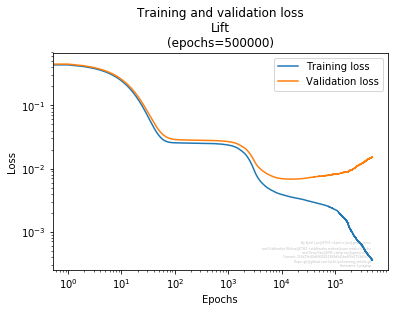


Training took 2003.860152721405 seconds


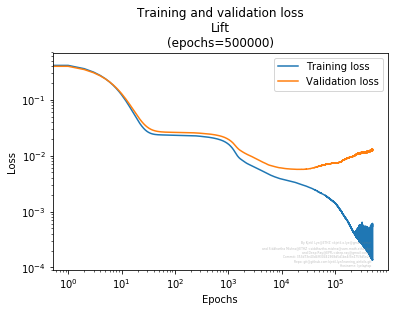


Training took 2036.7773225307465 seconds


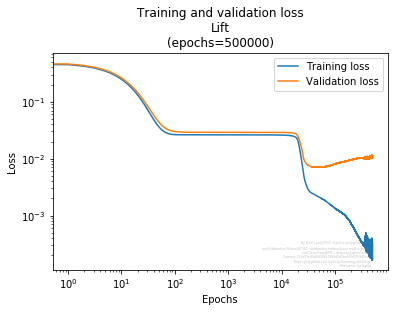


Training took 2080.1516921520233 seconds


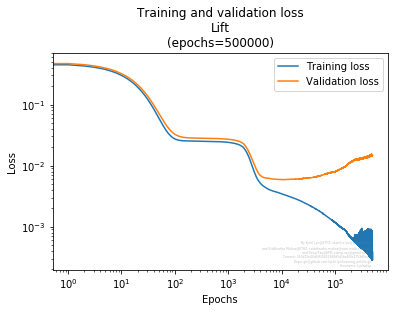


Training took 2102.481364965439 seconds


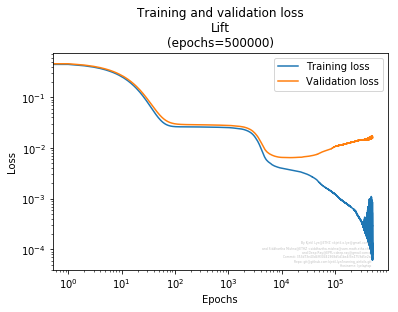

Best network index: 4
Total learning time took: 14027 s


##############################################################
#airfoil_mc_SGD_mean_squared_error_Lift_ts_128_bs_128_network#
##############################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      12    132
9      1     13
Sum          1149
-----  ----  ----------
##############################################################


Training took 2111.4325354099274 seconds


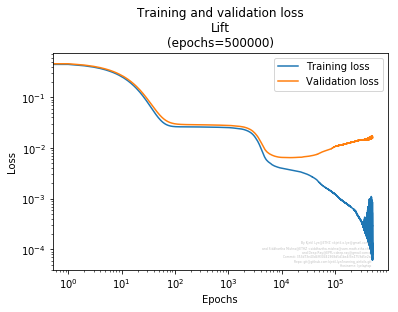

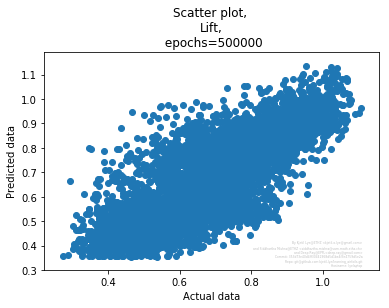

Number of parameters: 1149


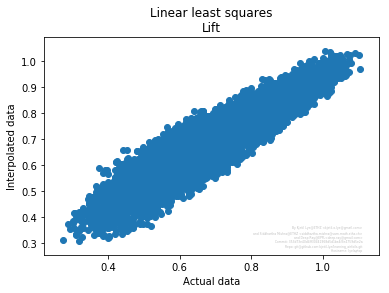

(5120,)
(5120, 6)


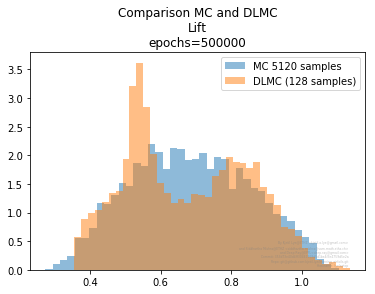

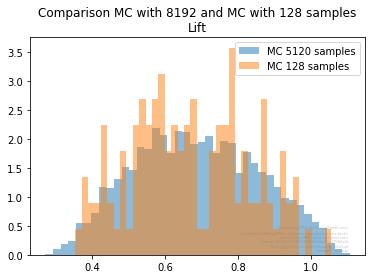

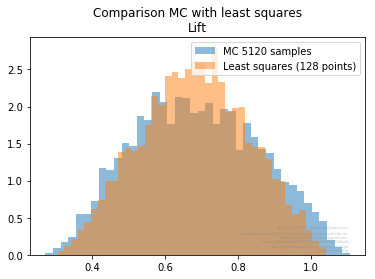

Memory usage: 1414396
Memory usage: 1414396


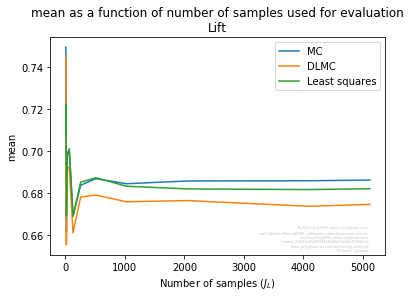

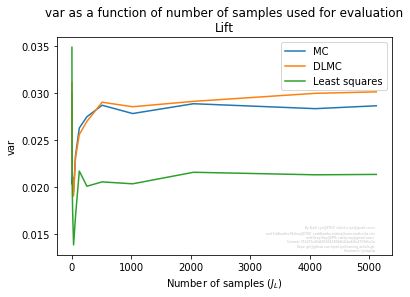

Memory usage: 1414396


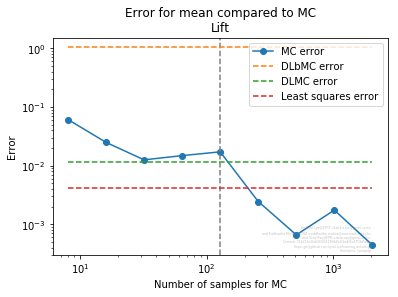

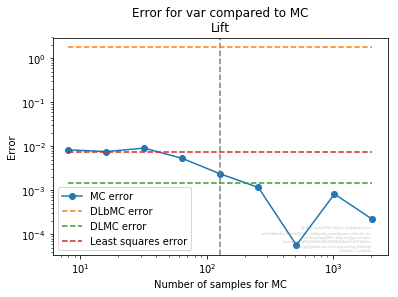

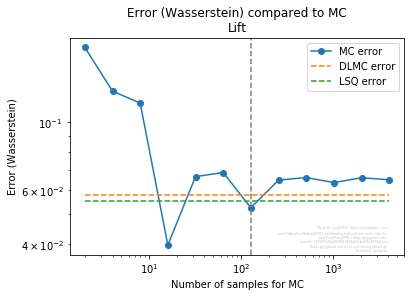


Training took 2143.2186341285706 seconds


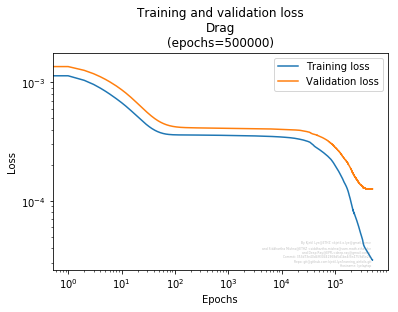


Training took 2184.276925802231 seconds


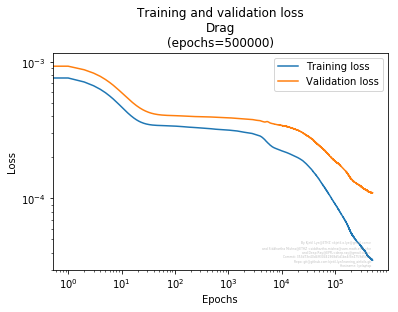


Training took 2373.886396408081 seconds


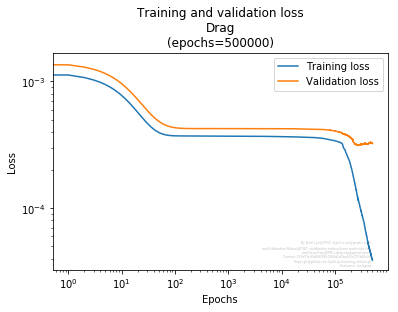


Training took 2311.2854347229004 seconds


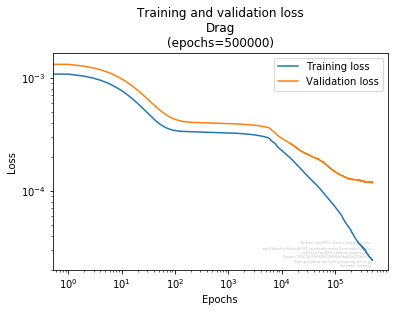


Training took 2334.013112783432 seconds


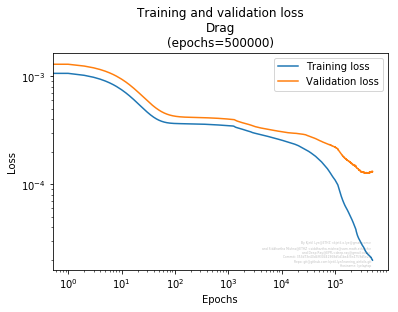

Best network index: 4
Total learning time took: 11389 s


##############################################################
#airfoil_mc_SGD_mean_squared_error_Drag_ts_128_bs_128_network#
##############################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      12    132
9      1     13
Sum          1149
-----  ----  ----------
##############################################################


Training took 2343.116960287094 seconds


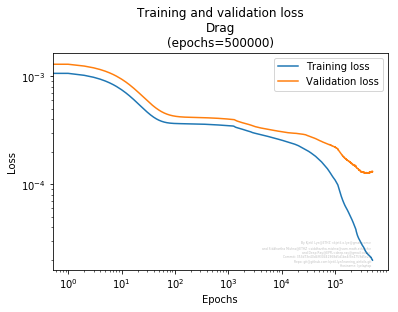

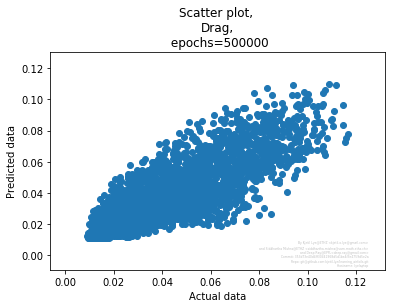

Number of parameters: 1149


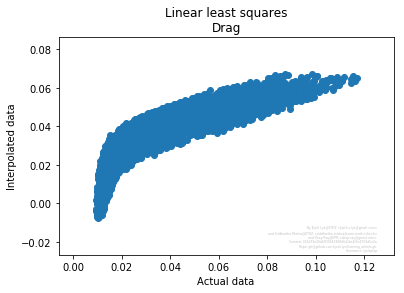

(5120,)
(5120, 6)


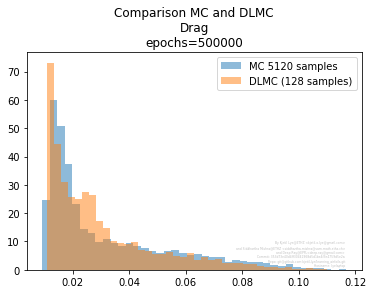

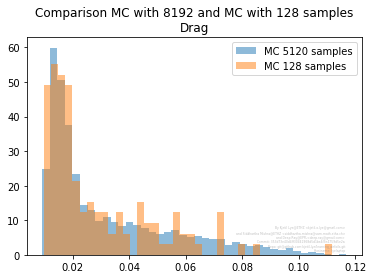

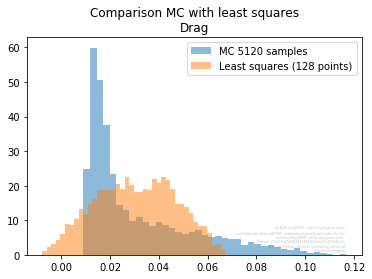

Memory usage: 1597412
Memory usage: 1597412


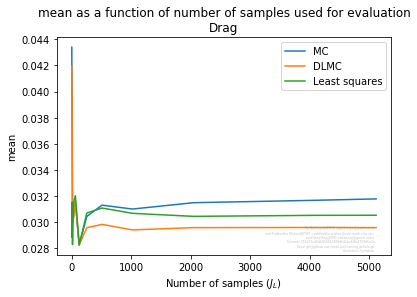

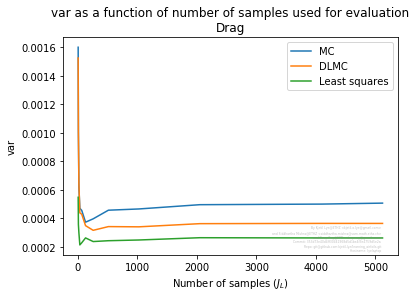

Memory usage: 1597412


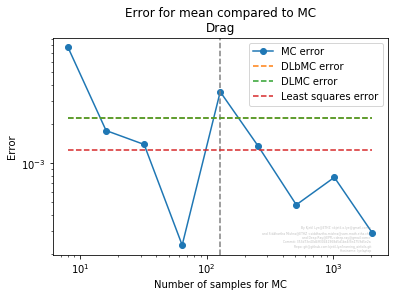

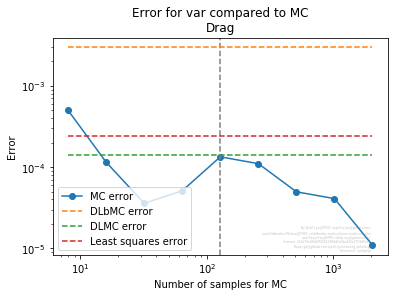

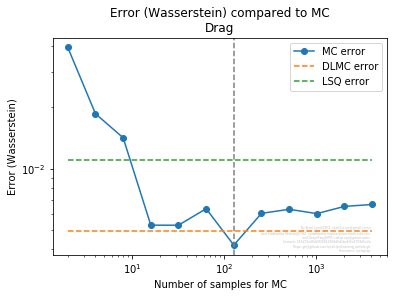



###################################################################
#airfoil_mc_SGD_mean_squared_error_all_ts_128_bs_128_speedup_table#
###################################################################
----  ------  ------  ------------------  ------------------  -------------------  --------------------  ------------------  ------------------
      MC 128  MC 128  DLMC                DLMC                DLbMC                DLbMC                 Least squares       Least squares
      mean    var     mean                var                 mean                 var                   mean                var
Lift  1.0     1.0     1.4843845899410293  1.5992110764885852  0.01669688062656907  0.001329537331393823  4.171111320337606   0.3242675876672588
Drag  1.0     1.0     1.6027894081131004  0.9392107964110702  1.6014898829777096   0.045057130012146125  2.8118554681556303  0.5469805904509626
----  ------  ------  ------------------  ------------------  -------------------  -----------


Training took 2385.555912733078 seconds


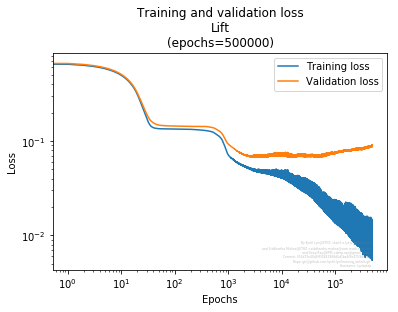


Training took 2434.0301356315613 seconds


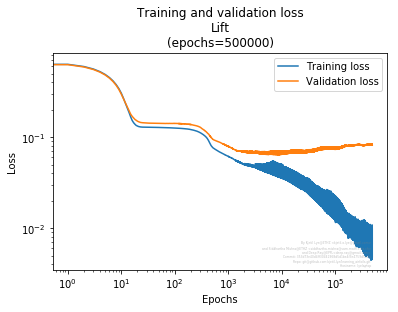


Training took 2472.9879236221313 seconds


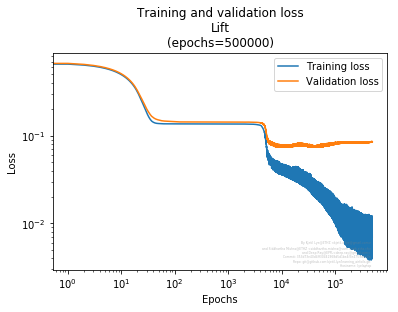


Training took 2509.8371608257294 seconds


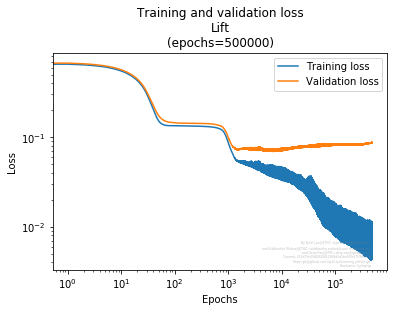


Training took 2544.746036529541 seconds


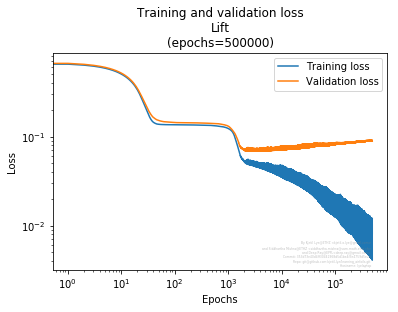

Best network index: 1
Total learning time took: 12394 s


###############################################################
#airfoil_mc_SGD_mean_absolute_error_Lift_ts_128_bs_128_network#
###############################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      12    132
9      1     13
Sum          1149
-----  ----  ----------
###############################################################


Training took 2554.9378654956818 seconds


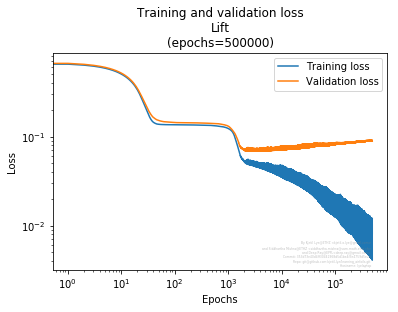

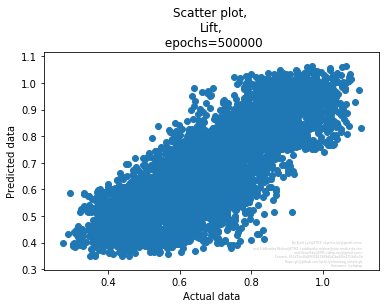

Number of parameters: 1149


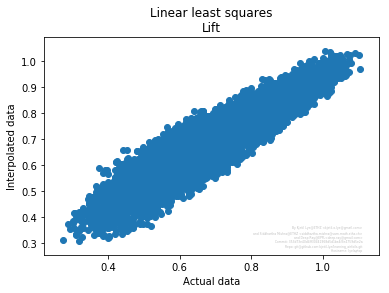

(5120,)
(5120, 6)


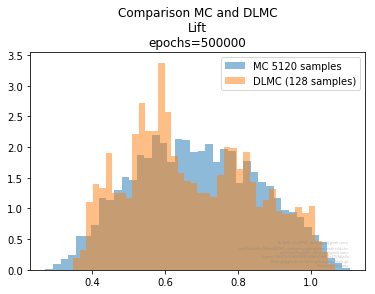

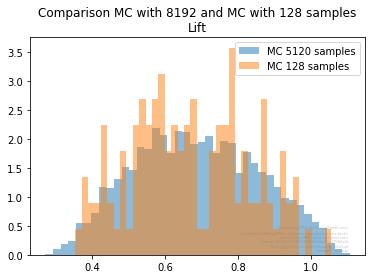

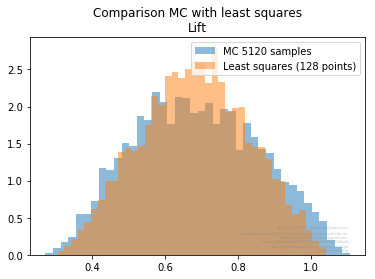

Memory usage: 1818260
Memory usage: 1818260


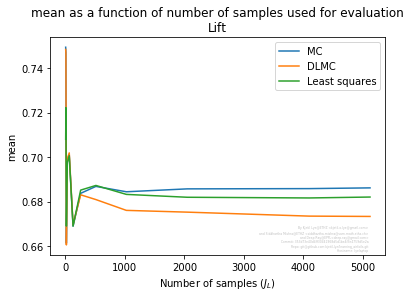

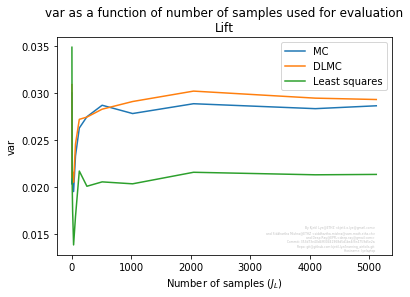

Memory usage: 1818260


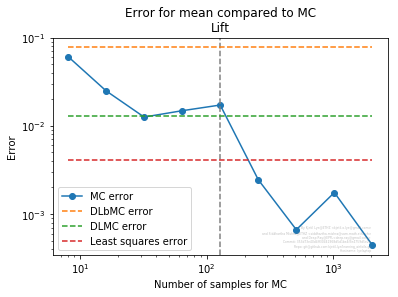

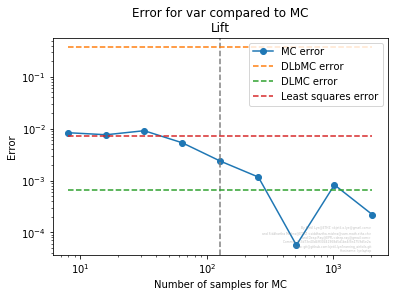

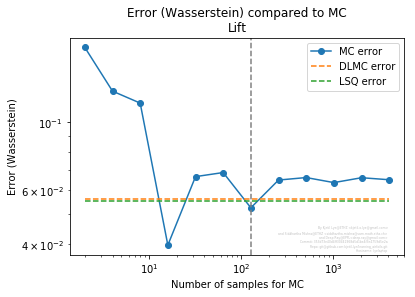


Training took 2574.5356662273407 seconds


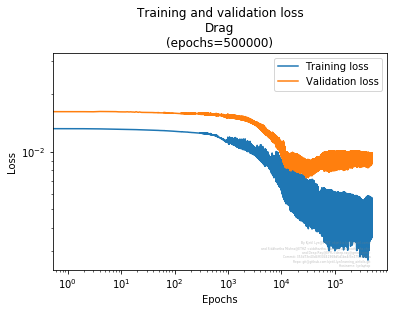


Training took 2627.8941621780396 seconds


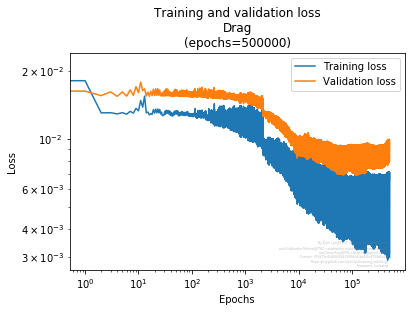


Training took 2668.4197974205017 seconds


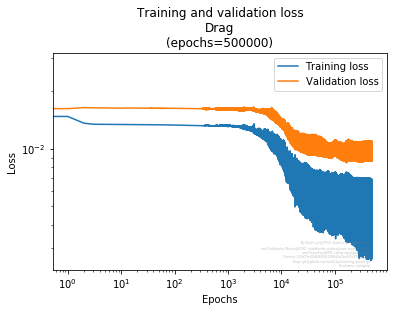


Training took 2708.0073404312134 seconds


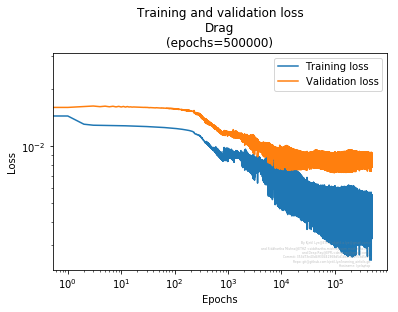


Training took 2745.8410201072693 seconds


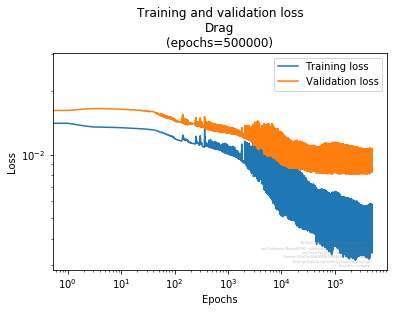

Best network index: 0
Total learning time took: 13385 s


###############################################################
#airfoil_mc_SGD_mean_absolute_error_Drag_ts_128_bs_128_network#
###############################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      12    132
9      1     13
Sum          1149
-----  ----  ----------
###############################################################


Training took 2760.0468969345093 seconds


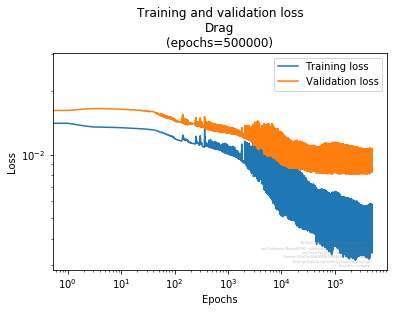

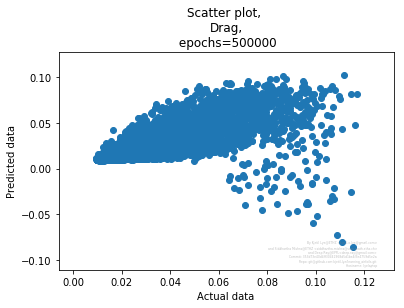

Number of parameters: 1149


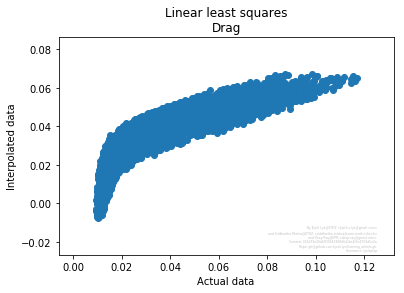

(5120,)
(5120, 6)


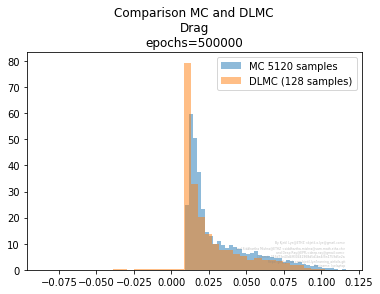

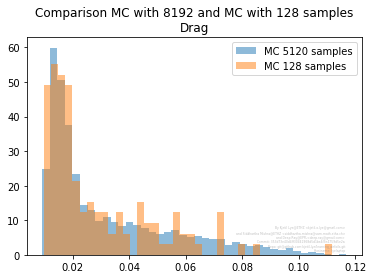

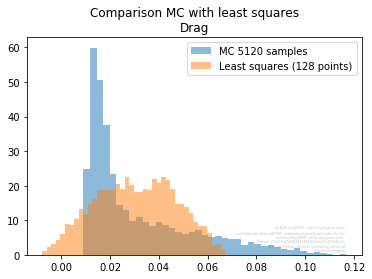

Memory usage: 2278840
Memory usage: 2278840


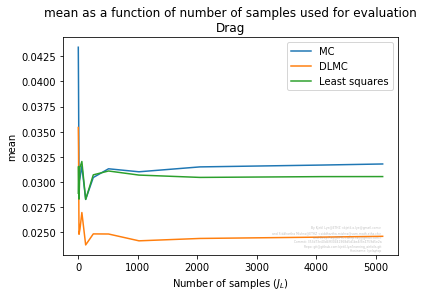

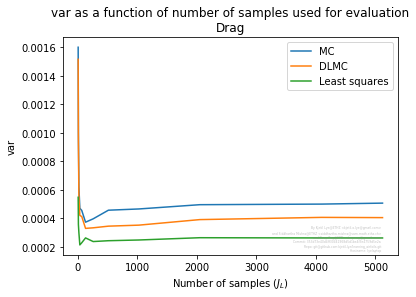

Memory usage: 2278840


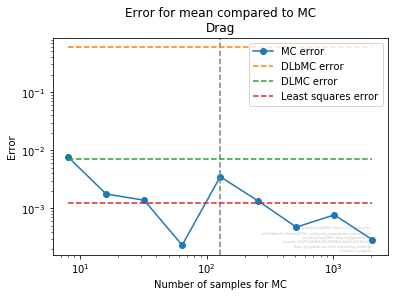

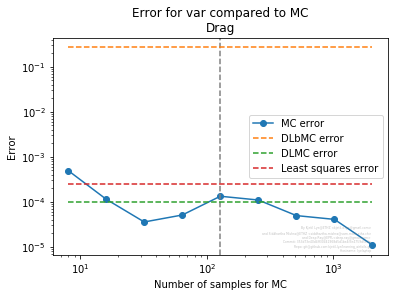

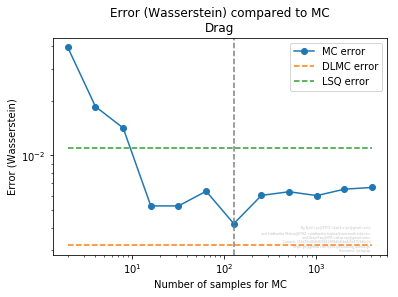



####################################################################
#airfoil_mc_SGD_mean_absolute_error_all_ts_128_bs_128_speedup_table#
####################################################################
----  ------  ------  -------------------  -----------------  -------------------  ---------------------  ------------------  ------------------
      MC 128  MC 128  DLMC                 DLMC               DLbMC                DLbMC                  Least squares       Least squares
      mean    var     mean                 var                mean                 var                    mean                var
Lift  1.0     1.0     1.3383554664279451   3.547726421833867  0.22240676867792436  0.006434767425971039   4.171111320337606   0.3242675876672588
Drag  1.0     1.0     0.48965601155789834  1.314726382915681  0.00600336220935195  0.0004926145182577178  2.8118554681556303  0.5469805904509626
----  ------  ------  -------------------  -----------------  -------------------  ---


Training took 2959.2658038139343 seconds


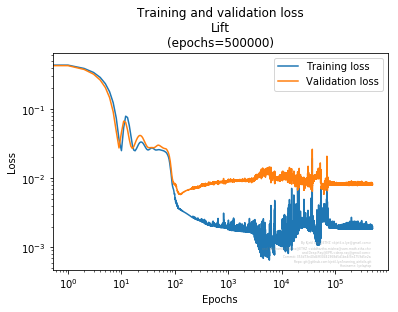


Training took 3047.6946585178375 seconds


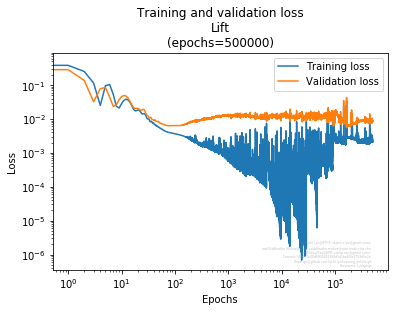


Training took 3186.7218544483185 seconds


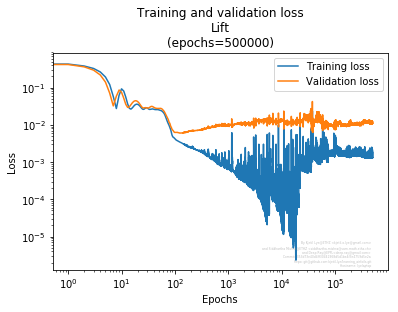


Training took 3278.266244649887 seconds


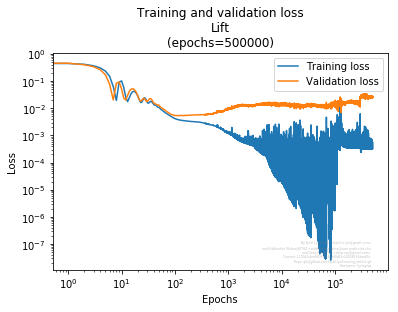


Training took 3388.5344383716583 seconds


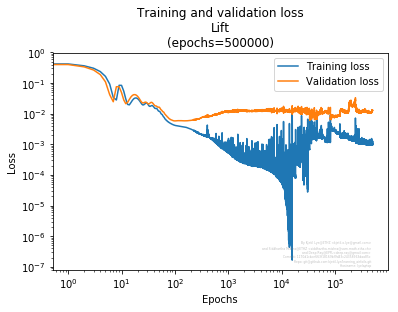

Best network index: 3
Total learning time took: 15909 s


###############################################################
#airfoil_mc_Adam_mean_squared_error_Lift_ts_128_bs_128_network#
###############################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      12    132
9      1     13
Sum          1149
-----  ----  ----------
###############################################################


Training took 3399.1310892105103 seconds


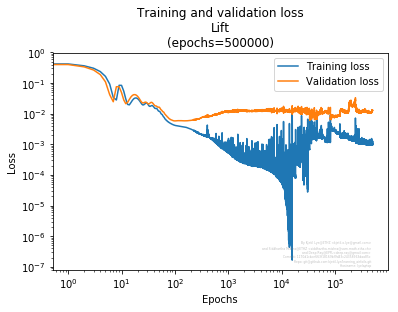

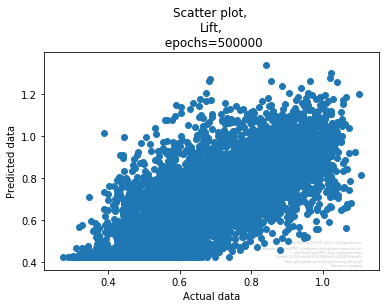

Number of parameters: 1149


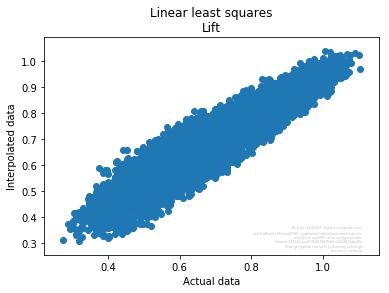

(5120,)
(5120, 6)


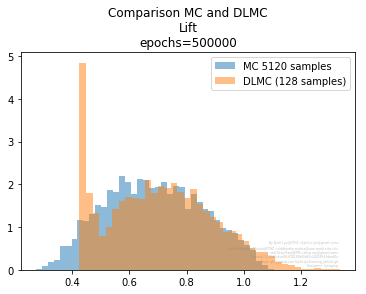

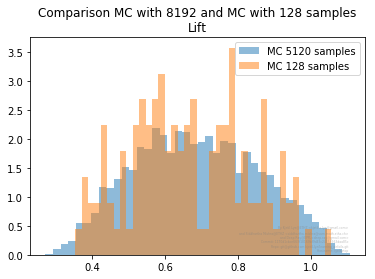

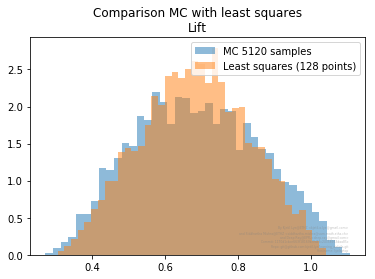

Memory usage: 2278840
Memory usage: 2278840


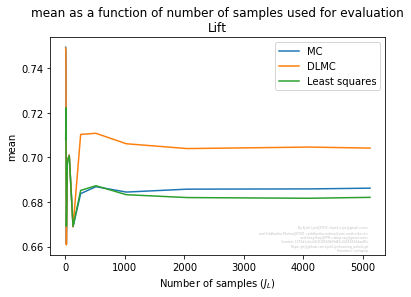

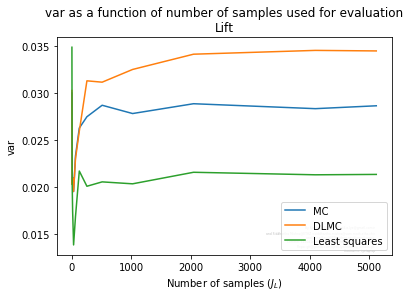

Memory usage: 2278840


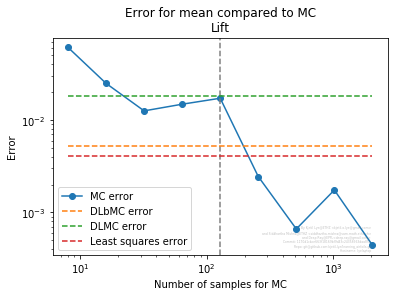

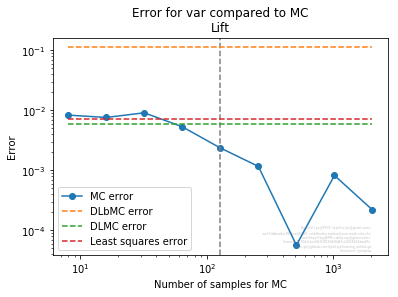

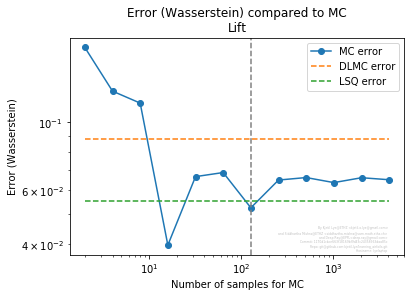


Training took 12176.662590742111 seconds


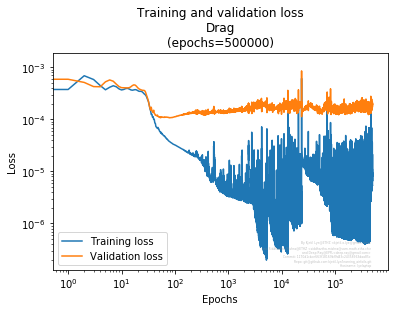


Training took 4392.587054729462 seconds


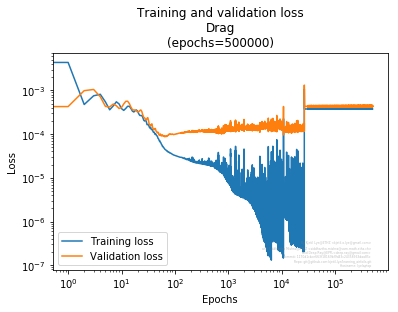


Training took 5034.925167798996 seconds


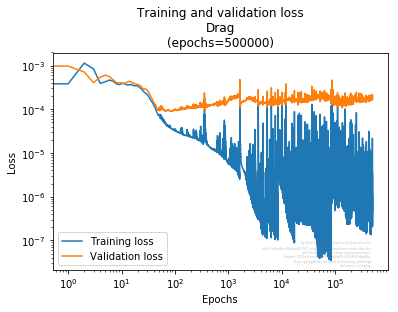


Training took 8158.676654338837 seconds


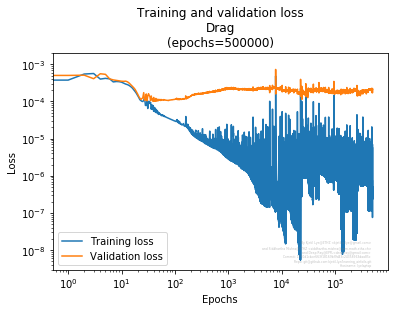


Training took 4363.48566365242 seconds


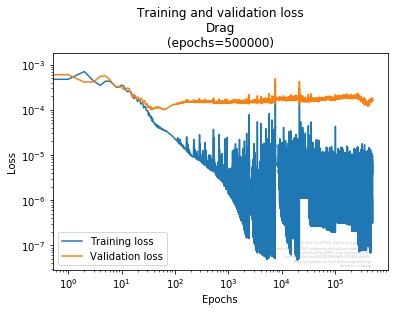

Best network index: 2
Total learning time took: 34207 s


###############################################################
#airfoil_mc_Adam_mean_squared_error_Drag_ts_128_bs_128_network#
###############################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      12    132
9      1     13
Sum          1149
-----  ----  ----------
###############################################################


Training took 4376.473654508591 seconds


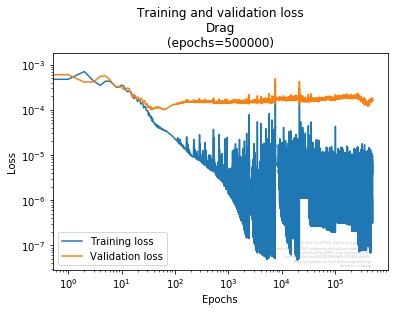

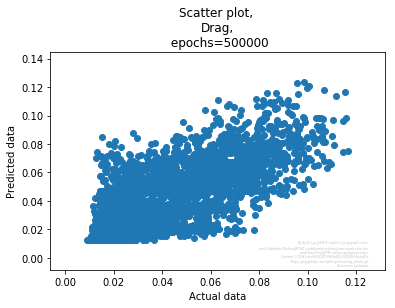

Number of parameters: 1149


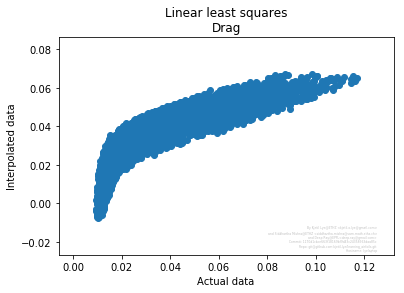

(5120,)
(5120, 6)


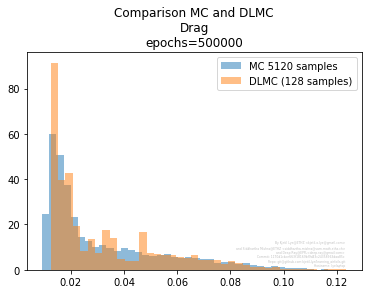

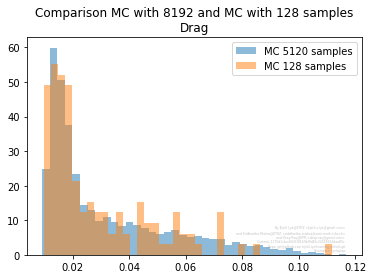

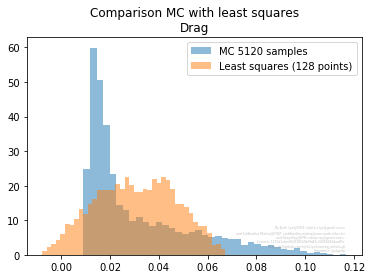

Memory usage: 2278840
Memory usage: 2278840


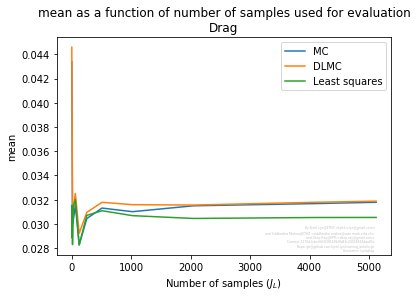

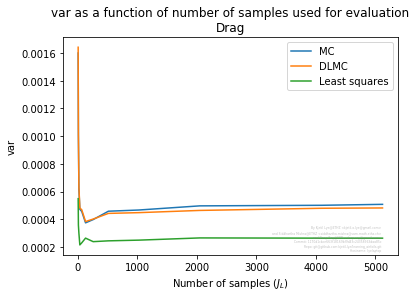

Memory usage: 2278840


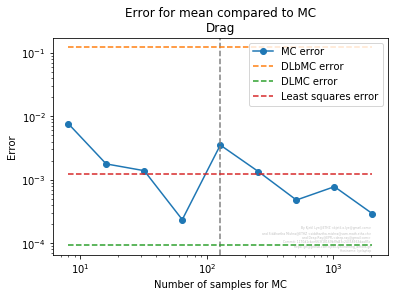

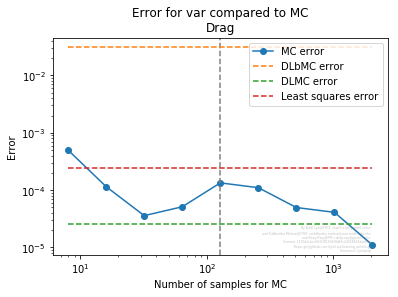

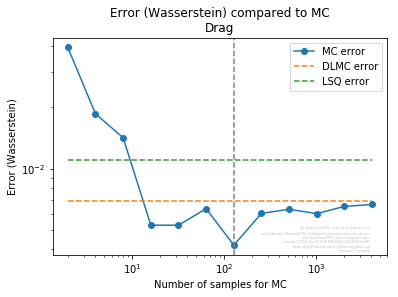



####################################################################
#airfoil_mc_Adam_mean_squared_error_all_ts_128_bs_128_speedup_table#
####################################################################
----  ------  ------  ------------------  ------------------  --------------------  --------------------  ------------------  ------------------
      MC 128  MC 128  DLMC                DLMC                DLbMC                 DLbMC                 Least squares       Least squares
      mean    var     mean                var                 mean                  var                   mean                var
Lift  1.0     1.0     0.9557805975657415  0.4056624882616344  3.2470499100596917    0.021108886948818354  4.171111320337606   0.3242675876672588
Drag  1.0     1.0     37.885427507282635  5.124805090231993   0.028837648067504853  0.00432607363487134   2.8118554681556303  0.5469805904509626
----  ------  ------  ------------------  ------------------  --------------------  --


Training took 4218.824984073639 seconds


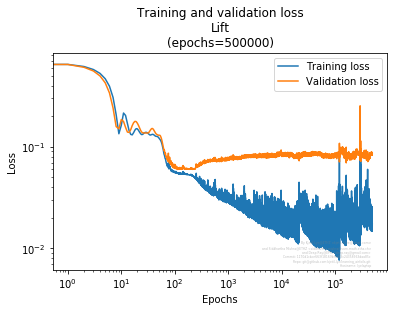


Training took 4333.428251504898 seconds


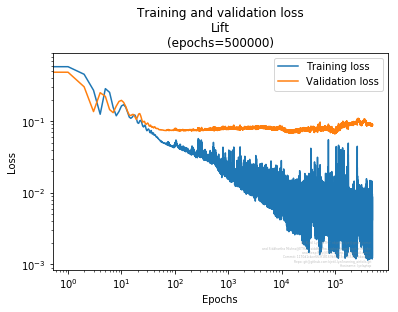


Training took 4573.1525847911835 seconds


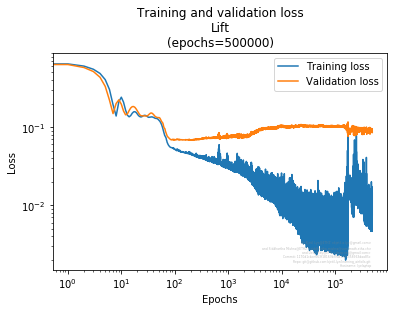


Training took 4902.594740867615 seconds


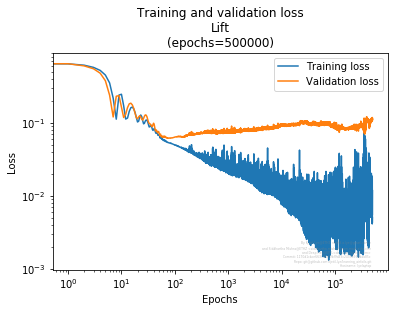


Training took 5033.724145412445 seconds


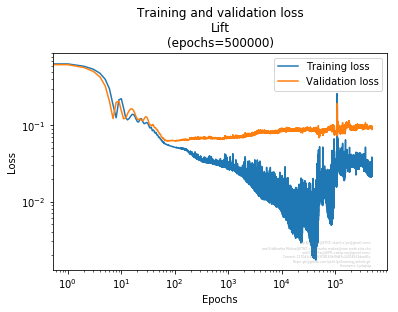

Best network index: 1
Total learning time took: 23120 s


################################################################
#airfoil_mc_Adam_mean_absolute_error_Lift_ts_128_bs_128_network#
################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      12    132
9      1     13
Sum          1149
-----  ----  ----------
################################################################


Training took 5045.592457771301 seconds


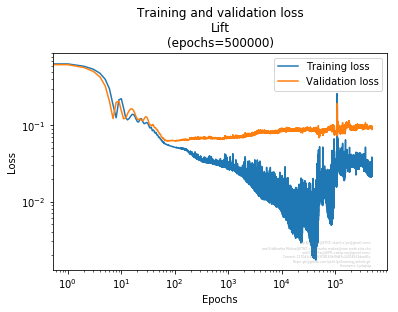

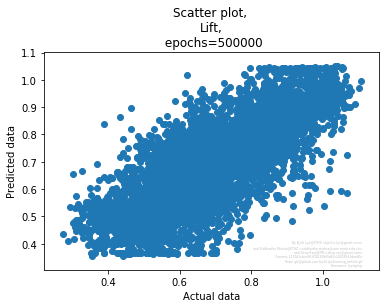

Number of parameters: 1149


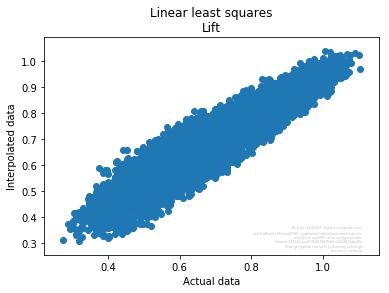

(5120,)
(5120, 6)


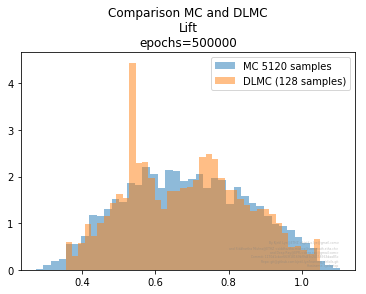

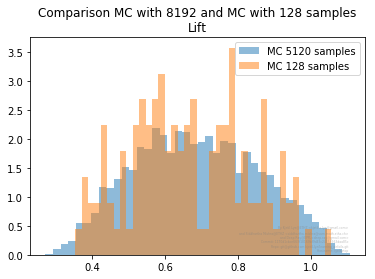

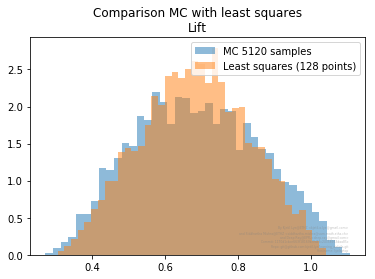

Memory usage: 2278840
Memory usage: 2278840


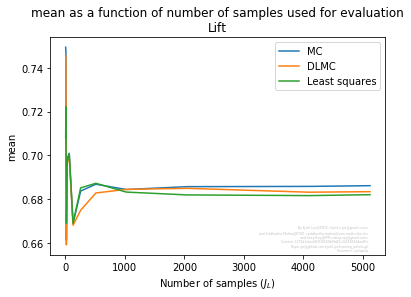

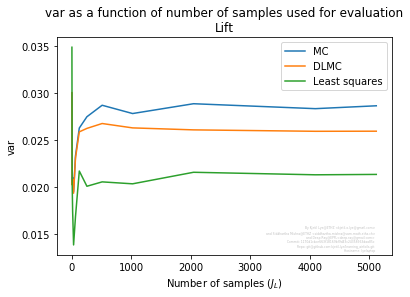

Memory usage: 2278840


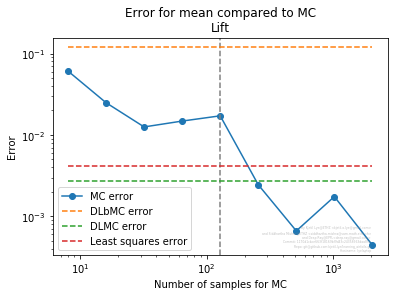

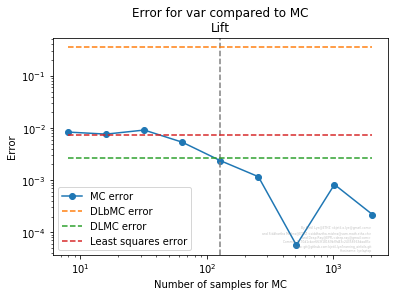

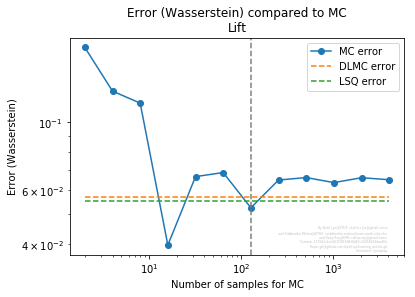


Training took 5108.686188697815 seconds


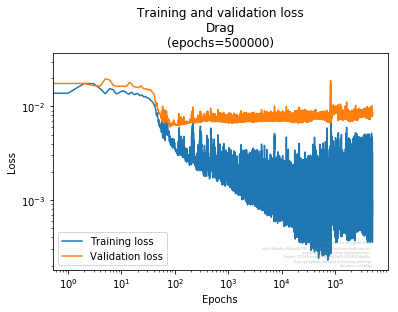


Training took 4659.919838666916 seconds


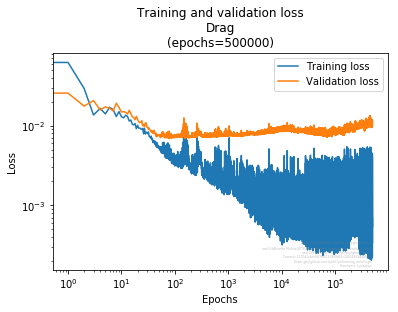


Training took 4454.135204076767 seconds


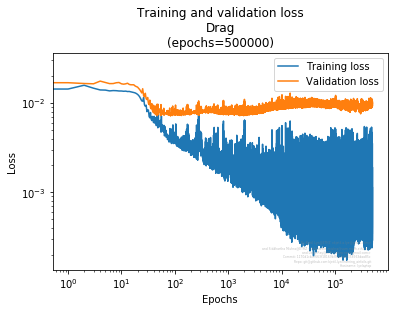


Training took 4538.99174785614 seconds


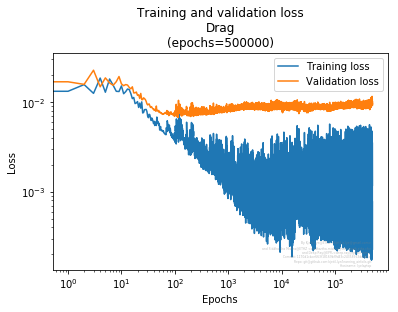


Training took 4644.810215950012 seconds


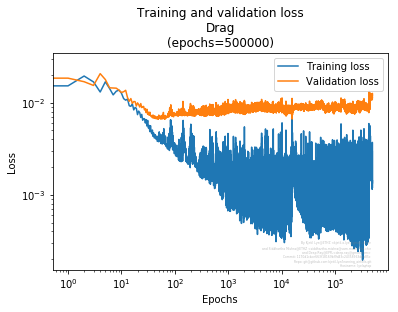

Best network index: 3
Total learning time took: 23474 s


################################################################
#airfoil_mc_Adam_mean_absolute_error_Drag_ts_128_bs_128_network#
################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      12    132
9      1     13
Sum          1149
-----  ----  ----------
################################################################


Training took 4658.739735841751 seconds


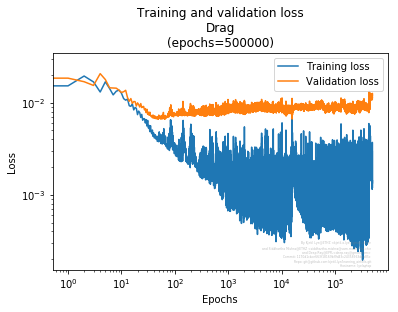

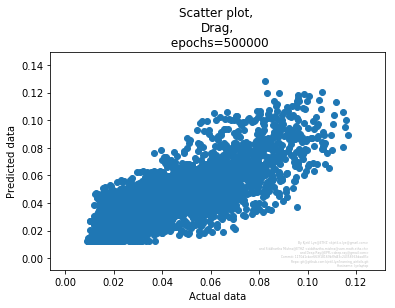

Number of parameters: 1149


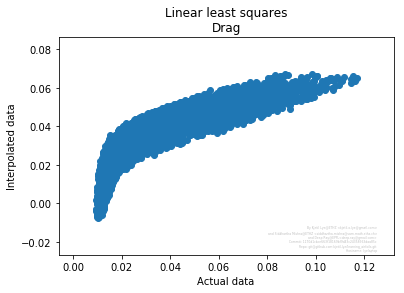

(5120,)
(5120, 6)


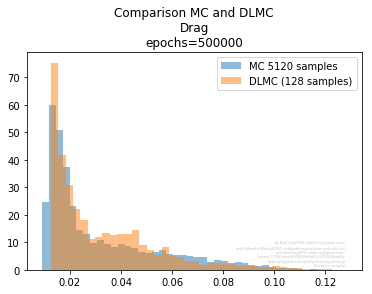

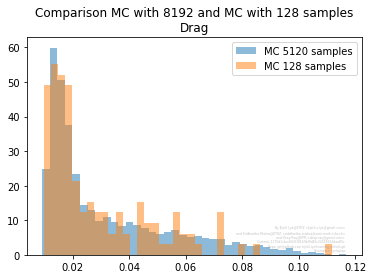

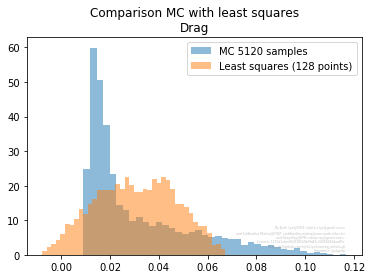

Memory usage: 2667024
Memory usage: 2667024


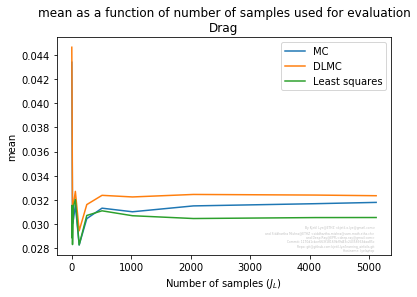

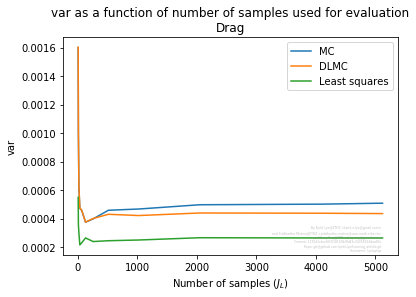

Memory usage: 2667024


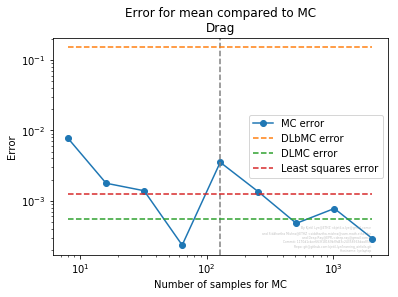

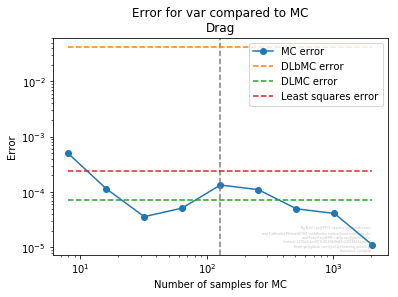

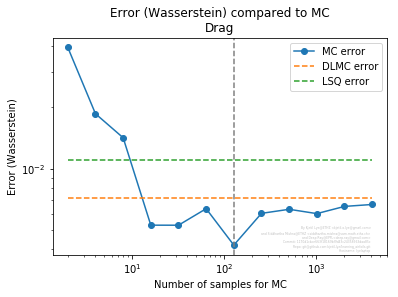



#####################################################################
#airfoil_mc_Adam_mean_absolute_error_all_ts_128_bs_128_speedup_table#
#####################################################################
----  ------  ------  -----------------  ------------------  --------------------  ---------------------  ------------------  ------------------
      MC 128  MC 128  DLMC               DLMC                DLbMC                 DLbMC                  Least squares       Least squares
      mean    var     mean               var                 mean                  var                    mean                var
Lift  1.0     1.0     6.288627399516018  0.8758492465882279  0.14454787181995593   0.006764272420171064   4.171111320337606   0.3242675876672588
Drag  1.0     1.0     6.366931128239147  1.8310021791158266  0.023405028560577933  0.0032620171588254544  2.8118554681556303  0.5469805904509626
----  ------  ------  -----------------  ------------------  --------------------  

In [9]:
force_names=['Lift', 'Drag']
batch_sizes=[train_size]
train_sizes = [16, 32, train_size]

optimizers = {"SGD": keras.optimizers.SGD,
             "Adam": keras.optimizers.Adam}

losses = ["mean_squared_error", "mean_absolute_error"]

for optimizer in optimizers.keys():
    for loss in losses:
        display(HTML("<h1>{} with {}</h1>".format(optimizer, loss)))

        for batch_size in batch_sizes:
            tables = Tables.make_default()
            
            for (n, f) in enumerate(force_names):
                seed_random_number(random_seed)
                network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                         network=airfoils_network, train_size=train_size,
                                                         validation_size=validation_size,
                                                        loss=loss, 
                                                        large_integration_points=None)
                
                output_information = OutputInformation(tables=tables, title=force_names[n],
                                                      short_title=force_names[n],
                                                      sampling_method='MC')
                showAndSave.prefix='airfoil_mc_%s_%s_%s_ts_%d_bs_%d' %(optimizer, loss, f,batch_size, train_size)
                get_network_and_postprocess(mc_points, forces[:,n+1], network_information = network_information,
                    output_information = output_information)
            
            showAndSave.prefix='airfoil_mc_%s_%s_all_ts_%d_bs_%d' %(optimizer, loss, batch_size, train_size)
            tables.write_tables()
  

# As a function of training errors

In [ ]:
force_names=['Lift', 'Drag']
epochs = 500000

optimizers = {"SGD": keras.optimizers.SGD,
             "Adam": keras.optimizers.Adam}
loss = "mean_squared_error"
optimizer='SGD'
for n in range(len(force_names)):
    f=force_names[n]
    tables = Tables.make_default()
    def run_function(network_information, output_information):
        showAndSave.prefix='airfoil_mc_convergence_%s_%s_%s_ts_%d_bs_%d' %(optimizer, loss, f, 
                                                                        network_information.batch_size,
                                                                        network_information.train_size)
        showAndSave.silent=True
        print_comparison_table.silent = True
        get_network_and_postprocess(mc_points, forces[:,n+1], network_information = network_information,
            output_information = output_information)
        
        showAndSave.prefix='airfoil_mc_convergence_result_%s_%s_%s' %(optimizer, loss, f)
        
        
    network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                     network=airfoils_network, train_size=None,
                                                     validation_size=None,
                                                    loss=loss, 
                                                    large_integration_points=None,
                                                    tries=5)
            
    output_information = OutputInformation(tables=tables, title=force_names[n],
                                          short_title=force_names[n], sampling_method='MC')
    
    plot_train_size_convergence(network_information,
                               output_information, 
                               run_function,
                               mc_points.shape[0]
                               )


Training took 4343.075855970383 seconds

Training took 9544.902667760849 seconds

Training took 4411.486385822296 seconds

Training took 4458.270539045334 seconds

Training took 102191.84841012955 seconds
Best network index: 1
Total learning time took: 124968 s
Training took 102196.84116077423 seconds
Number of parameters: 1149
(5120,)
(5120, 6)
Memory usage: 2667024
Memory usage: 2667024
Memory usage: 2667024

Training took 5617.706513404846 seconds

Training took 4579.2771072387695 seconds

Training took 4626.8546686172485 seconds

Training took 4719.554605722427 seconds

Training took 4731.810264587402 seconds
Best network index: 0
Total learning time took: 24295 s
Training took 4736.883044958115 seconds
Number of parameters: 1149
(5120,)
(5120, 6)
Memory usage: 2667024
Memory usage: 2667024
Memory usage: 2667024

Training took 4764.445014476776 seconds

Training took 4799.172811746597 seconds

Training took 4848.7904098033905 seconds

Training took 4884.517450809479 seconds

Train

In [ ]:
print(output_information.__dict__)